In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# "Particle" Class
A class which describes the properties of a particle.

In [3]:
class Particle():
    """
    x_pos = Position of Particle on x-axis.
    y_pos = Position of Particle on y-axis.
    vx = X-component of Velocity.
    vy = Y-component of Velocity.
    ax = X-component of Acceleration
    ay = Y-component of Acceleration
    colour = Colour of the particle
    """
    def __init__(self, x_pos, y_pos, colour, vx=0, vy=0, ax=0, ay=0):

        self.x = x_pos
        self.y = y_pos
        self.vx = vx
        self.vy = vy
        self.ax = ax
        self.ay = ay
        self.colour = colour

# "Create" class
A class to create multiple particles and assign random positions

In [4]:
class Create():
    """
        A class used to create particles with a particular colour.
        For example: 
                    green = Create(100, 'green')
        This will create 100 green coloured particles with random positions
                    
        Attributes:
        num = number of particles
        colour = colour of particles (e.g. 'green') (**string format**)
        x_limit = Range of x. (e.g. x_limit = 100 implies a range from 0 to 100 on x-axis)
        y_limit = Range of y. (e.g. y_limit = 220 implies a range from - to 220 on y-axis)
        """
    def __init__(self, num, colour, x_limit, y_limit):
        # size is the number of particle present.
        self.size = num
        self.colour = colour
        self.x_limit = x_limit
        self.y_limit = y_limit
        self.particle_list = self.create()
        self.update()
    
                
    def create(self):
        # Creating an empty list to store particles.
        particle_list = []

        # Running a loop to generate particles:
        for i in range(self.size):
            # random x (integer between '0 to x_limit')
            ran_x = np.random.randint(0, self.x_limit)
            # random y (integer between '0 to y_limit')
            ran_y = np.random.randint(0, self.y_limit)
            
            # Creating a particle
            particle = Particle(x_pos=ran_x, y_pos=ran_y,colour=self.colour)
            
            # Addiing the particle in the list.
            particle_list.append(particle)
        # Returning the list
        
        #**Note: Particle velocity and acceleration are not updated and =0**
        return particle_list
    
    def update(self):
        """
        Updates the position, velocity and acceleration of all particles."""
        # x and y component of positions of all particles
        self.x = [p.x for p in self.particle_list]
        self.y = [p.y for p in self.particle_list]
        
        # x and y velocity component of all particles
        self.vx = [p.vx for p in self.particle_list]
        self.vy = [p.vy for p in self.particle_list]
        
        # x and y acceleration component of all particles
        self.ax = [p.ax for p in self.particle_list]
        self.ay = [p.ay for p in self.particle_list]
        
    def plot(self, ax= None):
        """
        Plots the particles"""
        self.update()
        x_list, y_list, col = self.x, self.y, self.colour
        
        if ax is None:
            plt.scatter(x_list, y_list,c=col,s=1)
        else:
            ax.scatter(x_list, y_list,c=col,s=1)

In [5]:
def rule(particle1, particle2, force=10):
    """
    Takes two objects of 'Create' class.
    For example:
    
        ```
        green = Create(10, 'green', x_limit=100, y_limit=100)
        red = Create(10,'red',x_limit=100,y_limit=100)
        
        rule(green, red, force=0.1)
        # force = +ve => repulsive force
        # force = -ve => attractive force
        ```
        ### **Note**: only "green" particles will have their positions updated.
                     If you want to update the properties of red particles then
                     use :
                     `rule(red,green,force=-0.1)
                     `
                     This will attract red particles towards green particles
                
        
        ########
        particle1: any object from 'Create' class
        particle2: any object from 'Create' class
        force: force acting between the two particle objects.
        """
    for i in range(particle1.size):
        particle1.particle_list[i].ax = 0
        particle1.particle_list[i].ay = 0
        for j in range(particle2.size):
            a = particle1.particle_list[i]
            b = particle2.particle_list[j]
            dx = a.x - b.x
            dy = a.y - b.y
            d = np.sqrt(dx**2 + dy**2)
            if d>0 and d<0.16*particle1.x_limit:
                F = force*1/d
                a.ax += (F*dx)
                a.ay += (F*dy)
                
        a.vx = (a.vx + a.ax)*0.5
        a.vy = (a.vy + a.ay)*0.5
        a.x += a.vx
        a.y += a.vy
        particle1.particle_list[i] = a
        
        # Boundary condition
        if a.x <= 0 or a.x >= particle1.x_limit:
            a.vx *= -1
        if a.y <= 0 or a.y >= particle1.x_limit:
            a.vy *= -1

# Creating Life Patterns

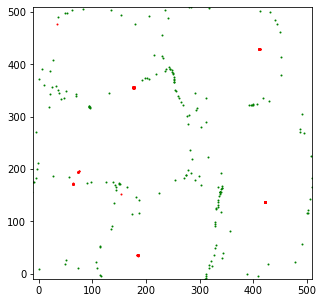

In [ ]:
# We set the x and y limit for the plot:
x_lim = 500
y_lim = 500

# Creating 'Create' objects 
green = Create(num = 200, colour='green',x_limit=x_lim, y_limit=y_lim)
red = Create(num = 200, colour='red',x_limit=x_lim,y_limit=y_lim)

# time loop
for i in range(200):
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    # plotting the particles
    green.plot(ax)
    red.plot(ax)
    
    # applying rules
    rule(green, red, force=0.05)
    rule(red, green, force = -0.01)
    rule(red,red, force=-0.1)
    
    # setting x limits (for plotting)
    ax.set_xlim(0-10,x_lim+10)
    ax.set_ylim(0-10,y_lim+10)
    
    plt.show()
    clear_output(wait=True)